### Librerías

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import random
from collections import Counter
from tqdm import tqdm
from random import randrange
from sklearn.neighbors import NearestNeighbors 
from math import sqrt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Metodología

### Recolectar

### Lectura de la base de datos

In [3]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#### Subsampling

In [4]:
df_sub = df.sample(frac = 0.05)
df_sub = df_sub.sort_index()
df_sub

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
15,No,29.18,No,No,No,1.0,0.0,No,Female,50-54,White,No,Yes,Very good,6.0,No,No,No
39,No,21.93,No,No,No,3.0,2.0,No,Female,70-74,Black,No,Yes,Fair,4.0,No,Yes,No
74,No,34.30,Yes,No,No,3.0,3.0,No,Male,60-64,White,No,Yes,Good,7.0,No,No,No
76,No,27.63,Yes,No,No,30.0,5.0,No,Female,75-79,White,Yes,Yes,Very good,8.0,No,No,No
79,No,30.56,Yes,No,No,0.0,0.0,No,Female,60-64,Black,No,Yes,Excellent,6.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319652,No,22.89,No,No,No,2.0,0.0,No,Male,45-49,Hispanic,Yes,Yes,Very good,5.0,No,No,No
319678,No,18.42,Yes,No,No,0.0,10.0,No,Female,75-79,Hispanic,No,Yes,Fair,4.0,Yes,No,No
319730,No,26.94,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,Yes,No,Fair,9.0,No,No,No
319733,No,19.01,No,No,No,0.0,0.0,No,Male,18-24,Hispanic,No,No,Good,8.0,No,No,No


### Preparar

#### Convertir las caracteristicas linguisticas a valores categoricos

In [5]:
datos = df_sub.copy()
datos =  datos[datos.columns].replace({'Male':0, 'Female':1})
datos =  datos[datos.columns].replace({'Excellent':4, 'Fair':1, 'Good':2,'Poor':0, 'Very good':3})
datos =  datos[datos.columns].replace({'American Indian/Alaskan Native':1, 'Asian':2, 'Black':3,'Hispanic':4, 'Other':5, 'White':6 })
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
datos['AgeCategory'] = datos['AgeCategory'].apply(lambda x: encode_AgeCategory[x])
datos['AgeCategory'] = datos['AgeCategory'].astype('float')

encode_Diabetic = {'Yes':1, 'No':0, 'No, borderline diabetes':2,'Yes (during pregnancy)':3}
datos['Diabetic'] = datos['Diabetic'].apply(lambda x: encode_Diabetic[x])
datos['Diabetic'] = datos['Diabetic'].astype('float')

encode = {'Yes':1, 'No':0}
datos['Smoking'] = datos['Smoking'].apply(lambda x: encode[x])
datos['Smoking'] = datos['Smoking'].astype('float')

datos['AlcoholDrinking'] = datos['AlcoholDrinking'].apply(lambda x: encode[x])
datos['AlcoholDrinking'] = datos['AlcoholDrinking'].astype('float')

datos['Stroke'] = datos['Stroke'].apply(lambda x: encode[x])
datos['Stroke'] = datos['Stroke'].astype('float')

datos['DiffWalking'] = datos['DiffWalking'].apply(lambda x: encode[x])
datos['DiffWalking'] = datos['DiffWalking'].astype('float')

datos['PhysicalActivity'] = datos['PhysicalActivity'].apply(lambda x: encode[x])
datos['PhysicalActivity'] = datos['PhysicalActivity'].astype('float')

datos['Asthma'] = datos['Asthma'].apply(lambda x: encode[x])
datos['Asthma'] = datos['Asthma'].astype('float')

datos['KidneyDisease'] = datos['KidneyDisease'].apply(lambda x: encode[x])
datos['KidneyDisease'] = datos['KidneyDisease'].astype('float')

datos['SkinCancer'] = datos['SkinCancer'].apply(lambda x: encode[x])
datos['SkinCancer'] = datos['SkinCancer'].astype('float')

datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
15,No,29.18,0.0,0.0,0.0,1.0,0.0,0.0,1,52.0,6,0.0,1.0,3,6.0,0.0,0.0,0.0
39,No,21.93,0.0,0.0,0.0,3.0,2.0,0.0,1,72.0,3,0.0,1.0,1,4.0,0.0,1.0,0.0
74,No,34.30,1.0,0.0,0.0,3.0,3.0,0.0,0,62.0,6,0.0,1.0,2,7.0,0.0,0.0,0.0
76,No,27.63,1.0,0.0,0.0,30.0,5.0,0.0,1,77.0,6,1.0,1.0,3,8.0,0.0,0.0,0.0
79,No,30.56,1.0,0.0,0.0,0.0,0.0,0.0,1,62.0,3,0.0,1.0,4,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319652,No,22.89,0.0,0.0,0.0,2.0,0.0,0.0,0,47.0,4,1.0,1.0,3,5.0,0.0,0.0,0.0
319678,No,18.42,1.0,0.0,0.0,0.0,10.0,0.0,1,77.0,4,0.0,1.0,1,4.0,1.0,0.0,0.0
319730,No,26.94,0.0,0.0,0.0,0.0,0.0,0.0,1,80.0,4,1.0,0.0,1,9.0,0.0,0.0,0.0
319733,No,19.01,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,4,0.0,0.0,2,8.0,0.0,0.0,0.0


#### Comprobar la no existencia de datos faltantes

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15990 entries, 15 to 319771
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      15990 non-null  object 
 1   BMI               15990 non-null  float64
 2   Smoking           15990 non-null  float64
 3   AlcoholDrinking   15990 non-null  float64
 4   Stroke            15990 non-null  float64
 5   PhysicalHealth    15990 non-null  float64
 6   MentalHealth      15990 non-null  float64
 7   DiffWalking       15990 non-null  float64
 8   Sex               15990 non-null  int64  
 9   AgeCategory       15990 non-null  float64
 10  Race              15990 non-null  int64  
 11  Diabetic          15990 non-null  float64
 12  PhysicalActivity  15990 non-null  float64
 13  GenHealth         15990 non-null  int64  
 14  SleepTime         15990 non-null  float64
 15  Asthma            15990 non-null  float64
 16  KidneyDisease     15990 non-null  floa

In [7]:
datos['GenHealth']=datos['GenHealth'].astype('float64')

In [8]:
datos.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
def valores_faltantes(dataset):
    missing_values_count = dataset.isnull().sum()
    total_missing = missing_values_count.sum() 
    #Porcentaje de datos faltantes
    total_missing_porcent = total_missing/(np.product(dataset.shape))*100
    print('Porcentaje total de valores faltantes:',total_missing_porcent,'%')
    print('')
    print('Porcentaje de valores faltantes de cada atributo:')
    for col in dataset.columns:
        VP_missing = np.mean(dataset[col].isnull())
        print('{} - {}%'.format(col,round(VP_missing*100)))  

In [10]:
valores_faltantes(datos)

Porcentaje total de valores faltantes: 0.0 %

Porcentaje de valores faltantes de cada atributo:
HeartDisease - 0%
BMI - 0%
Smoking - 0%
AlcoholDrinking - 0%
Stroke - 0%
PhysicalHealth - 0%
MentalHealth - 0%
DiffWalking - 0%
Sex - 0%
AgeCategory - 0%
Race - 0%
Diabetic - 0%
PhysicalActivity - 0%
GenHealth - 0%
SleepTime - 0%
Asthma - 0%
KidneyDisease - 0%
SkinCancer - 0%


#### Identificación de outliers

<AxesSubplot:>

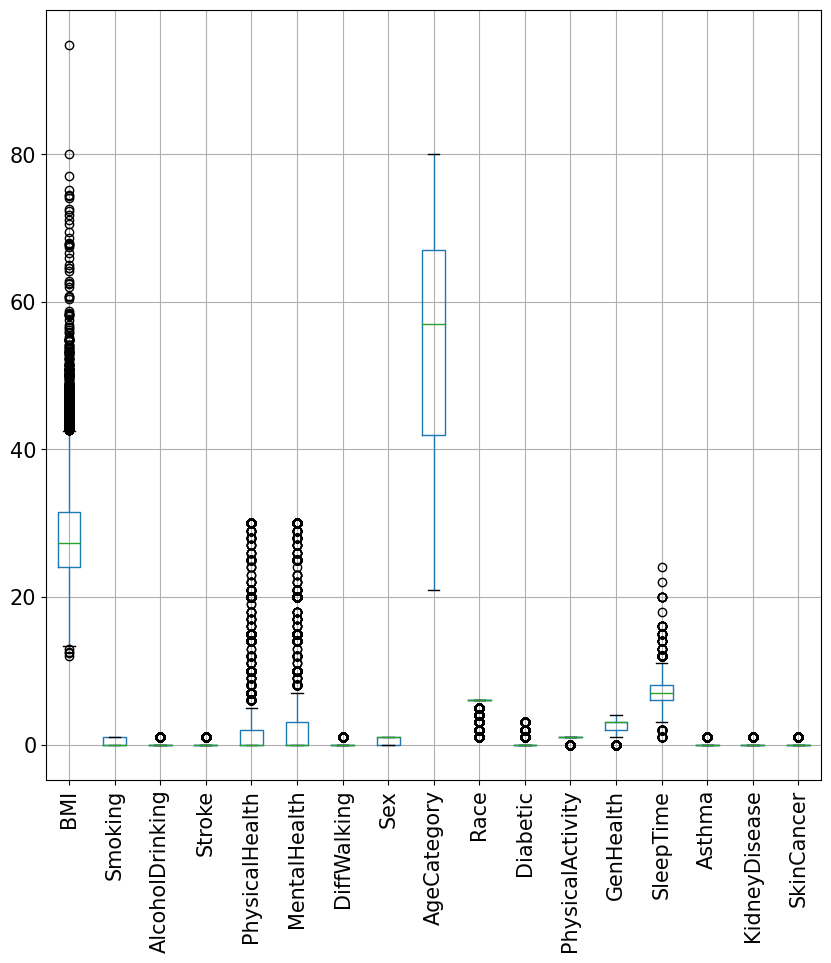

In [11]:
datos.boxplot(rot=90, fontsize=15,figsize = (10,10))

#### Normalización de los datos

In [12]:
def norm_min_max(datos):
    lim_sup = []
    lim_inf = []
    rangoDatos =[]
    maxNorm = 1
    minNorm = 0
    rango = maxNorm - minNorm
    for i in range (0,datos.columns.size):
        lim_sup.append(datos.iloc[:,i].max())
        lim_inf.append(datos.iloc[:,i].min())
        rangoDatos.append(lim_sup[i] - lim_inf[i])
    nombres = datos.columns.values.tolist()
    datosNorm = pd.DataFrame(columns = nombres)

    for j in range(len(datos.columns)):
        varNorm = []
        var = datos.iloc[:,j]
        for i in range(len(datos)):
            D = var[i] - lim_inf[j]
            DPct = D/rangoDatos[j]
            dNorm = rango*DPct
            varNorm.append(minNorm+dNorm)
        datosNorm.iloc[:,j] = varNorm
    datos = datosNorm
    return datos

In [13]:
d =pd.DataFrame(datos)
d = d.reset_index()
d = d.drop(['index'],axis=1) #Eliminando el atributo de decisión 
d

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,29.18,0.0,0.0,0.0,1.0,0.0,0.0,1,52.0,6,0.0,1.0,3.0,6.0,0.0,0.0,0.0
1,No,21.93,0.0,0.0,0.0,3.0,2.0,0.0,1,72.0,3,0.0,1.0,1.0,4.0,0.0,1.0,0.0
2,No,34.30,1.0,0.0,0.0,3.0,3.0,0.0,0,62.0,6,0.0,1.0,2.0,7.0,0.0,0.0,0.0
3,No,27.63,1.0,0.0,0.0,30.0,5.0,0.0,1,77.0,6,1.0,1.0,3.0,8.0,0.0,0.0,0.0
4,No,30.56,1.0,0.0,0.0,0.0,0.0,0.0,1,62.0,3,0.0,1.0,4.0,6.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,No,22.89,0.0,0.0,0.0,2.0,0.0,0.0,0,47.0,4,1.0,1.0,3.0,5.0,0.0,0.0,0.0
15986,No,18.42,1.0,0.0,0.0,0.0,10.0,0.0,1,77.0,4,0.0,1.0,1.0,4.0,1.0,0.0,0.0
15987,No,26.94,0.0,0.0,0.0,0.0,0.0,0.0,1,80.0,4,1.0,0.0,1.0,9.0,0.0,0.0,0.0
15988,No,19.01,0.0,0.0,0.0,0.0,0.0,0.0,0,21.0,4,0.0,0.0,2.0,8.0,0.0,0.0,0.0


In [14]:
d_S = d.loc[:,['BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','GenHealth','SleepTime']]
CD_S = d.loc[:,['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']]
datos_norm = norm_min_max(d_S)
datos_norm = pd.concat([datos_norm, CD_S], axis=1)
datos_norm

C:\Users\gaby9\AppData\Local\Temp\ipykernel_15008\1809094097.py:23: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  datosNorm.iloc[:,j] = varNorm


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0.207171,0.033333,0.000000,0.525424,1.0,0.000000,0.75,0.217391,No,0.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0
1,0.119643,0.100000,0.066667,0.864407,0.4,0.000000,0.25,0.130435,No,0.0,0.0,0.0,0.0,1,1.0,0.0,1.0,0.0
2,0.268985,0.100000,0.100000,0.694915,1.0,0.000000,0.50,0.260870,No,1.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
3,0.188458,1.000000,0.166667,0.949153,1.0,0.333333,0.75,0.304348,No,1.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0
4,0.223832,0.000000,0.000000,0.694915,0.4,0.000000,1.00,0.217391,No,1.0,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15985,0.131233,0.066667,0.000000,0.440678,0.6,0.333333,0.75,0.173913,No,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
15986,0.077267,0.000000,0.333333,0.949153,0.6,0.000000,0.25,0.130435,No,1.0,0.0,0.0,0.0,1,1.0,1.0,0.0,0.0
15987,0.180128,0.000000,0.000000,1.000000,0.6,0.333333,0.25,0.347826,No,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
15988,0.084390,0.000000,0.000000,0.000000,0.6,0.000000,0.50,0.304348,No,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


### Analizar

#### Distribución de la información por atributo

In [15]:
datos_norm.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
count,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000,15990.000000
mean,0.196502,0.110786,0.133273,0.563652,0.877561,0.065103,0.650109,0.264481,0.410444,0.068355,0.035897,0.136085,0.529894,0.772983,0.132958,0.039212,0.093934
std,0.076276,0.263234,0.268345,0.303308,0.243580,0.165617,0.258828,0.062794,0.491930,0.252362,0.186040,0.342890,0.499121,0.418917,0.339540,0.194105,0.291746
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145479,0.000000,0.000000,0.355932,1.000000,0.000000,0.500000,0.217391,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.185319,0.000000,0.000000,0.610169,1.000000,0.000000,0.750000,0.260870,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.234698,0.066667,0.100000,0.779661,1.000000,0.000000,0.750000,0.304348,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


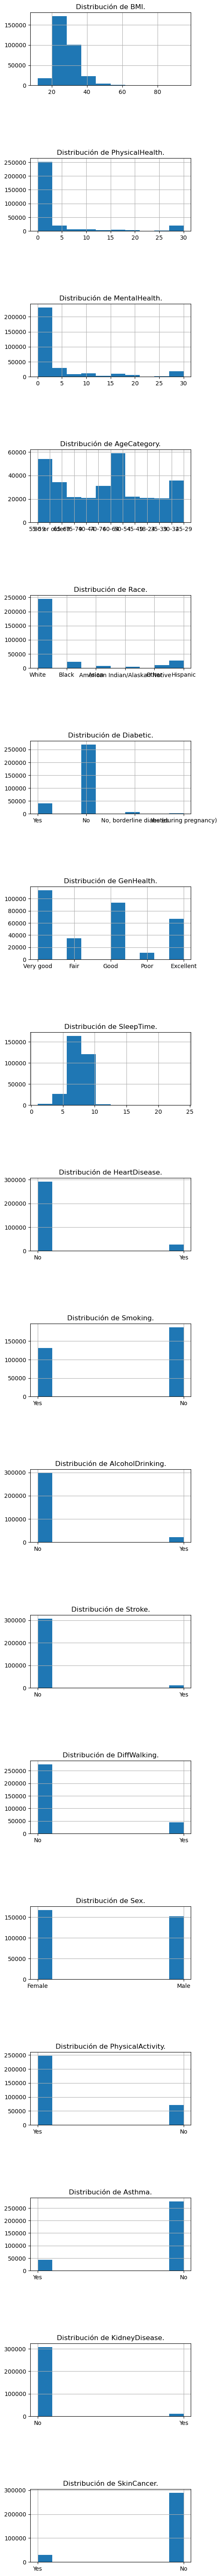

In [16]:
columnas = datos_norm.columns.values
fig, axs = plt.subplots(df.shape[1], 1, figsize = (5,80))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = df[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)


#### Reducción de dimensionalidad (PCA)

In [17]:
def matriz_cov(data):
    atributos = data.columns 
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = (((X-X.mean())*(Y-Y.mean())).sum())/(len(X)-1)
    return m

In [18]:
def PCA(datos,col_decision):
    datos1 = datos.drop([col_decision],axis=1) #Eliminando el atributo de decisión 
    #Ajustar los datos restando la media a cada atributo
    datos_A = pd.DataFrame(columns=datos1.columns,index=range(len(datos1)))
    for i in datos_A.columns:
        datos_A[i] = datos1[i] - datos1[i].mean()    
    #datos_A  
    matrix = matriz_cov(datos_A)  
    #sns.heatmap(matrix)  
    L,V =  np.linalg.eig(matrix)  
    #Obtener el porcentaje de covarianza de cada uno de los atributos
    total = L.sum()
    p = (L/total)*100
    pca =[]
    columnas1 = datos_A.columns.values
    for index, row in enumerate(p):
        print(columnas1[index] + ':',row)  

In [19]:
col_decision = 'HeartDisease'
PCA(datos_norm,col_decision)

BMI: 18.80617587507004
PhysicalHealth: 17.401516804262407
MentalHealth: 12.516989416537749
AgeCategory: 8.439456897612398
Race: 8.227099474830597
Diabetic: 6.391864050351866
GenHealth: 0.34413109189044033
SleepTime: 0.2496446523693282
Smoking: 4.889889027576242
AlcoholDrinking: 1.6114469693276832
Stroke: 4.135116059485256
DiffWalking: 3.8125179488044667
Sex: 3.529814594519539
PhysicalActivity: 2.9265054682523224
Asthma: 2.082275048320166
KidneyDisease: 2.261153633402386
SkinCancer: 2.3744029873871204


In [20]:
datos_PCA = datos_norm.loc[:,['HeartDisease','BMI','PhysicalHealth','MentalHealth','AgeCategory','Race','Diabetic','Smoking','AlcoholDrinking','Stroke','DiffWalking','PhysicalActivity']]
datos_PCA

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity
0,No,0.207171,0.033333,0.000000,0.525424,1.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,No,0.119643,0.100000,0.066667,0.864407,0.4,0.000000,0.0,0.0,0.0,0.0,1.0
2,No,0.268985,0.100000,0.100000,0.694915,1.0,0.000000,1.0,0.0,0.0,0.0,1.0
3,No,0.188458,1.000000,0.166667,0.949153,1.0,0.333333,1.0,0.0,0.0,0.0,1.0
4,No,0.223832,0.000000,0.000000,0.694915,0.4,0.000000,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15985,No,0.131233,0.066667,0.000000,0.440678,0.6,0.333333,0.0,0.0,0.0,0.0,1.0
15986,No,0.077267,0.000000,0.333333,0.949153,0.6,0.000000,1.0,0.0,0.0,0.0,1.0
15987,No,0.180128,0.000000,0.000000,1.000000,0.6,0.333333,0.0,0.0,0.0,0.0,0.0
15988,No,0.084390,0.000000,0.000000,0.000000,0.6,0.000000,0.0,0.0,0.0,0.0,0.0


#### División de los conjuntos de entrenamiento y prueba

In [21]:
def method_8020(x,y):
    train_x = x[0 : int(len(x)*0.8)]
    train_y = y[0 : int(len(y)*0.8)]
    test_x = x[int(len(x)*0.8) : ]
    test_y = y[int(len(y)*0.8) : ]
    return train_x, train_y, test_x, test_y

In [22]:
#Reducir el conjunto de datos
dataset_x = datos_PCA.drop(['HeartDisease'],axis=1) #Eliminando el atributo de decisión 
dataset_y = datos_PCA['HeartDisease']
#dataset_x = dataset_x[:10000]
#dataset_y = dataset_y[:10000]

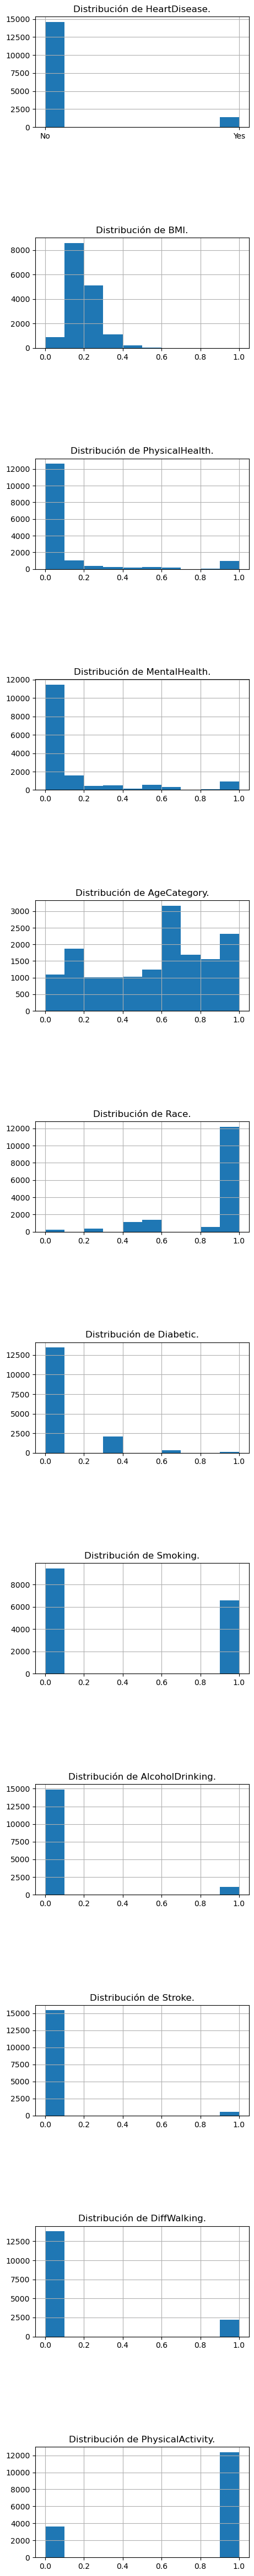

In [23]:
data_ = datos_PCA
columnas = data_.columns.values
fig, axs = plt.subplots(data_.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = data_[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

In [24]:
train_x, train_y, test_x, test_y = method_8020(dataset_x,dataset_y)
print('Total de train X:',len(train_x))
print('Total de train Y:',len(train_y))
print('Total de test X:',len(test_x))
print('Total de test Y:',len(test_y))

Total de train X: 12792
Total de train Y: 12792
Total de test X: 3198
Total de test Y: 3198


In [25]:
train_x['HeartDisease'] = train_y
train_x

C:\Users\gaby9\AppData\Local\Temp\ipykernel_15008\515223552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_x['HeartDisease'] = train_y


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,HeartDisease
0,0.207171,0.033333,0.000000,0.525424,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,No
1,0.119643,0.100000,0.066667,0.864407,0.4,0.000000,0.0,0.0,0.0,0.0,1.0,No
2,0.268985,0.100000,0.100000,0.694915,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,No
3,0.188458,1.000000,0.166667,0.949153,1.0,0.333333,1.0,0.0,0.0,0.0,1.0,No
4,0.223832,0.000000,0.000000,0.694915,0.4,0.000000,1.0,0.0,0.0,0.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
12787,0.088495,0.000000,0.000000,0.864407,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,No
12788,0.316914,0.066667,0.033333,0.610169,1.0,0.333333,0.0,1.0,0.0,1.0,0.0,Yes
12789,0.196789,1.000000,0.000000,0.864407,1.0,0.000000,1.0,0.0,0.0,1.0,1.0,No
12790,0.141615,0.000000,0.166667,0.186441,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,No


#### Etapa de Aumento de datos

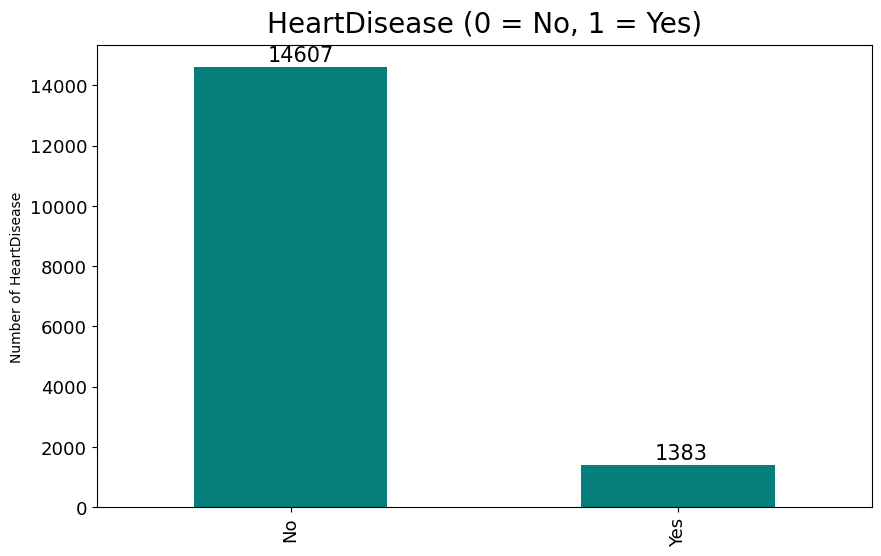

In [31]:
ax = datos_norm['HeartDisease'].value_counts().plot(kind ='bar',figsize=(10,6), fontsize = 13, color = '#057E7C')
ax.set_title('HeartDisease (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of HeartDisease')

for i in ax.patches:
    ax.text(i.get_x()+0.19, i.get_height()+200, str(round(i.get_height(),2)),fontsize =15)

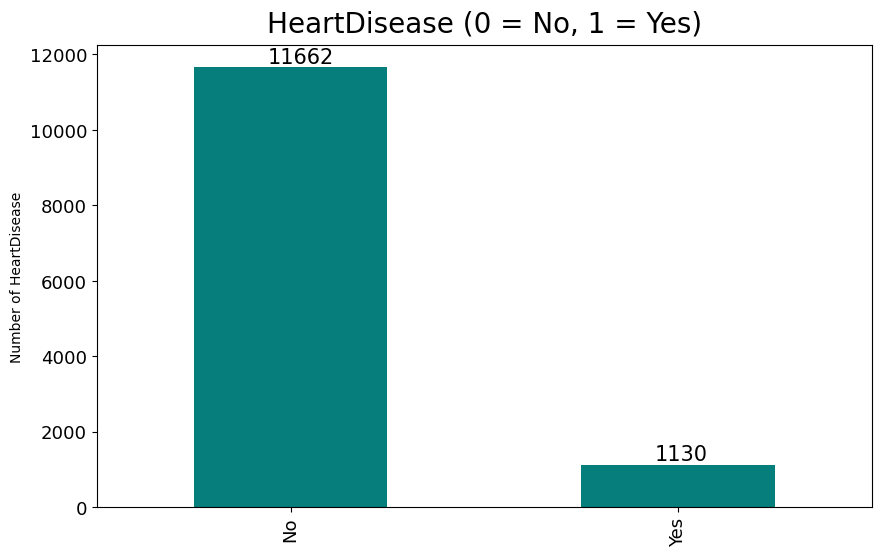

In [30]:
ax = train_x['HeartDisease'].value_counts().plot(kind ='bar',figsize=(10,6), fontsize = 13, color = '#057E7C')
ax.set_title('HeartDisease (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of HeartDisease')

for i in ax.patches:
    ax.text(i.get_x()+0.19, i.get_height()+100, str(round(i.get_height(),2)),fontsize =15)

##### Modelo de ruleta

In [38]:
def probabilidad(datos,columns_df,i):  
    item_counts=datos[columns_df[i]].value_counts(normalize =True)       #probabilidad de que este valor aparezca en la base de datos
    return (item_counts.cumsum()).to_numpy() #suma acumulativa de la posibilidad para priorizar valores

In [39]:
def Ruleta(datos,Porc_datos,columns_df):
    #generar datos sinteticos a partir de método ruleta
    total_cells =np.product(datos.shape)
    N_datos = total_cells*(int(Porc_datos)/100)
    syn = []
    for j in tqdm(range(int(N_datos))):
        row = []
        for i in range(len(columns_df)):
            obs = datos[columns_df[i]].value_counts().index.tolist()       #valor unico
            Prob_np = probabilidad(datos,columns_df,i)
            rand_value = random.random()       #Generar un porcentaje aleatorio
            flecha = np.argwhere(rand_value <= Prob_np)       #Buscar el porcentaje más cercano alcanzado por los valores unicos
            new_value = obs[int(flecha[0])]       #Obtener el valor para generar dato sintetico
            row.append(new_value)
        syn.append(row)
    d_syn = pd.DataFrame(syn, columns = columns_df)   #Crear un macro de datos de los datos sinteticos
    syn_final = pd.concat([datos,d_syn],ignore_index=True)   #Agregar datos sintéticos a la copia de los datos originales
    return syn_final

In [40]:
data_ruleta= train_x
print('Total de valores:',len(data_ruleta))
#Definir los atributos
columns_ruleta = list(data_ruleta.columns)
Porcentaje = 10
syn_final = Ruleta(data_ruleta,Porcentaje,columns_ruleta)
syn_final

Total de valores: 12792


100%|██████████| 15350/15350 [03:51<00:00, 66.30it/s]


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,HeartDisease
0,0.207171,0.033333,0.000000,0.525424,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,No
1,0.119643,0.100000,0.066667,0.864407,0.4,0.000000,0.0,0.0,0.0,0.0,1.0,No
2,0.268985,0.100000,0.100000,0.694915,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,No
3,0.188458,1.000000,0.166667,0.949153,1.0,0.333333,1.0,0.0,0.0,0.0,1.0,No
4,0.223832,0.000000,0.000000,0.694915,0.4,0.000000,1.0,0.0,0.0,0.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
28137,0.501751,0.000000,0.000000,0.440678,0.6,0.000000,0.0,0.0,0.0,0.0,1.0,No
28138,0.098515,0.000000,0.000000,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,No
28139,0.135217,0.000000,0.333333,1.000000,1.0,0.000000,1.0,0.0,0.0,1.0,1.0,No
28140,0.166365,0.000000,0.166667,0.610169,1.0,0.333333,0.0,0.0,0.0,0.0,1.0,No


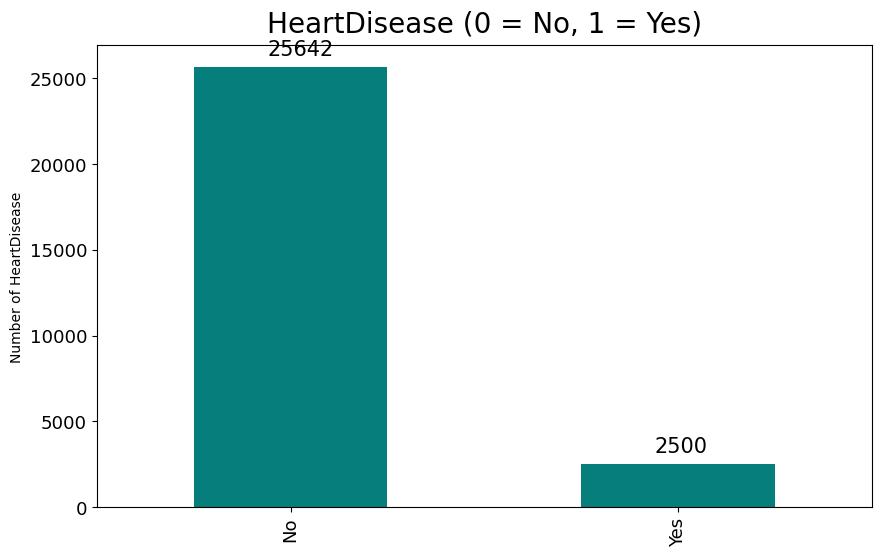

In [41]:
ax = syn_final['HeartDisease'].value_counts().plot(kind ='bar',figsize=(10,6), fontsize = 13, color = '#057E7C')
ax.set_title('HeartDisease (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of HeartDisease')

for i in ax.patches:
    ax.text(i.get_x()+0.19, i.get_height()+700, str(round(i.get_height(),2)),fontsize =15)

In [42]:
#Desviacion estandar original
data_std = datos_PCA.std()
data_std

C:\Users\gaby9\AppData\Local\Temp\ipykernel_15008\3450967691.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_std = datos_PCA.std()


BMI                 0.076276
PhysicalHealth      0.263234
MentalHealth        0.268345
AgeCategory         0.303308
Race                0.243580
Diabetic            0.165617
Smoking             0.491930
AlcoholDrinking     0.252362
Stroke              0.186040
DiffWalking         0.342890
PhysicalActivity    0.418917
dtype: float64

In [43]:
syn_final.std()

C:\Users\gaby9\AppData\Local\Temp\ipykernel_15008\3084967440.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  syn_final.std()


BMI                 0.076578
PhysicalHealth      0.264886
MentalHealth        0.268425
AgeCategory         0.302981
Race                0.246275
Diabetic            0.166645
Smoking             0.493366
AlcoholDrinking     0.253289
Stroke              0.187957
DiffWalking         0.341343
PhysicalActivity    0.418732
dtype: float64

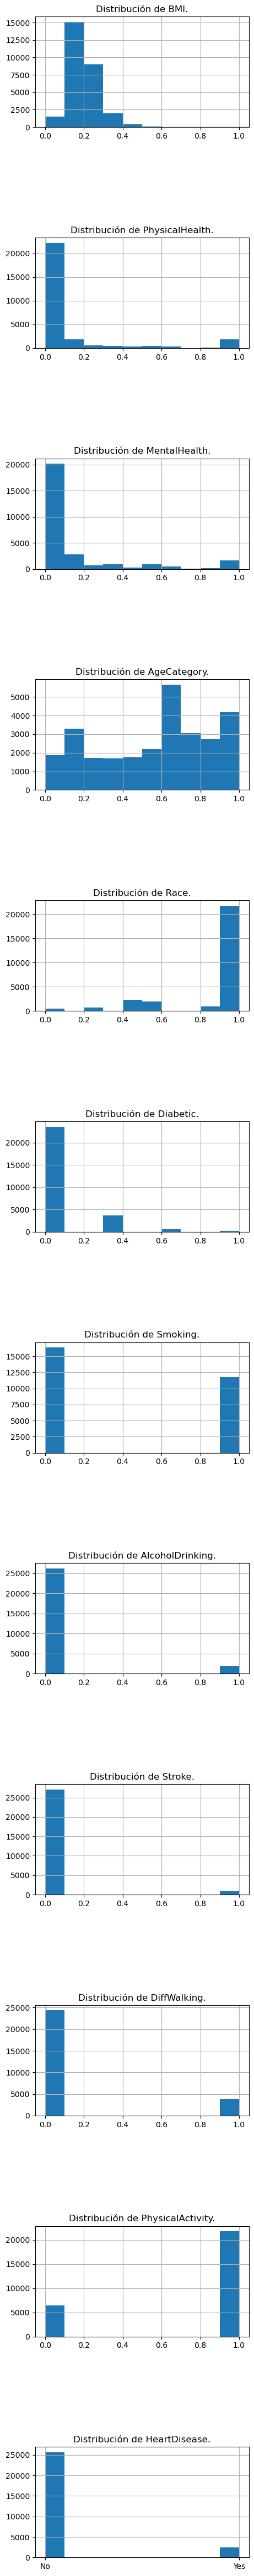

In [44]:
columnas = syn_final.columns.values
fig, axs = plt.subplots(syn_final.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = syn_final[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

##### Técnica de SMOTE

In [32]:
def get_neigbours(M, k):
    nn = NearestNeighbors(n_neighbors=k, metric="euclidean").fit(M)
    dist, indices = nn.kneighbors(M, return_distance=True)
    return dist, indices

def SMOTE(df, k):
    total_data = df.values.tolist()
    labelCont = Counter(df[data.columns[-1]].values)
    majority_num = max(labelCont.values())

    for label, num in tqdm(labelCont.items()):
        #print('label',label, ' num', num)
        if num < majority_num:
            to_add = majority_num - num #diferencia entre cada clase del atributo de decisión
            print('# Atributo de decisión con mayor numero:',majority_num, ' # Atributo de decisión con menor numero',num)
            last_column = df[df.columns[-1]] #Identificación del atributo de decisión
            data_w_label = df.loc[last_column == label] #Extracción de las filas con el atributo de decisión menor
            #print(label)
            data_no_label = data_w_label[df.columns[:-1]].values
            #print(data_no_label)
            if len(data_no_label) < k:
                k = len(data_no_label) # void # of neighbors >= sample size
            #print('K',k)

            M=data_no_label
            t = M.shape[0] # number of minority class samples
            numattrs = M.shape[1]

            synthetic = []
            for _ in range(to_add):
                _, indices = get_neigbours(M, k)
                for i in range(t):
                    neighbour = randrange(0, k)
                    diff = M[indices[i, neighbour]] - M[i]
                    gap = random.uniform(0, 1)
                    synthetic.append(M[i] + gap*diff)
            M_S = synthetic[:to_add]    
            M_S = pd.DataFrame(M_S)
            M_S['-']=label

            for n in range(len(M_S)):
                new_row =M_S.iloc[n]
                total_data.append(new_row)
            df_final =pd.DataFrame(total_data)
    return df_final,M_S

def apply_smote(data,k):
    cols = data.columns
    df_final,M_synthetic = SMOTE(data, k)
    for i,n in enumerate(cols):
        df_final.rename(columns={i:n}, inplace=True)
    return df_final

In [33]:
data = train_x
print('Total de valores:',len(data))
df_SMOTE = apply_smote(data,5)
df_SMOTE

Total de valores: 12792


  0%|          | 0/2 [00:00<?, ?it/s]

# Atributo de decisión con mayor numero: 11662  # Atributo de decisión con menor numero 1130


100%|██████████| 2/2 [05:41<00:00, 170.61s/it]


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,HeartDisease
0,0.207171,0.033333,0.000000,0.525424,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,No
1,0.119643,0.100000,0.066667,0.864407,0.4,0.000000,0.0,0.0,0.0,0.0,1.0,No
2,0.268985,0.100000,0.100000,0.694915,1.0,0.000000,1.0,0.0,0.0,0.0,1.0,No
3,0.188458,1.000000,0.166667,0.949153,1.0,0.333333,1.0,0.0,0.0,0.0,1.0,No
4,0.223832,0.000000,0.000000,0.694915,0.4,0.000000,1.0,0.0,0.0,0.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
23319,0.114099,0.000000,0.000000,0.993975,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,Yes
23320,0.296107,0.000000,0.000000,0.949153,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,Yes
23321,0.206131,0.000000,0.000000,1.000000,1.0,0.000000,0.0,0.0,0.0,0.0,1.0,Yes
23322,0.209626,0.000000,0.000000,0.949272,1.0,0.333333,1.0,0.0,0.0,0.0,1.0,Yes


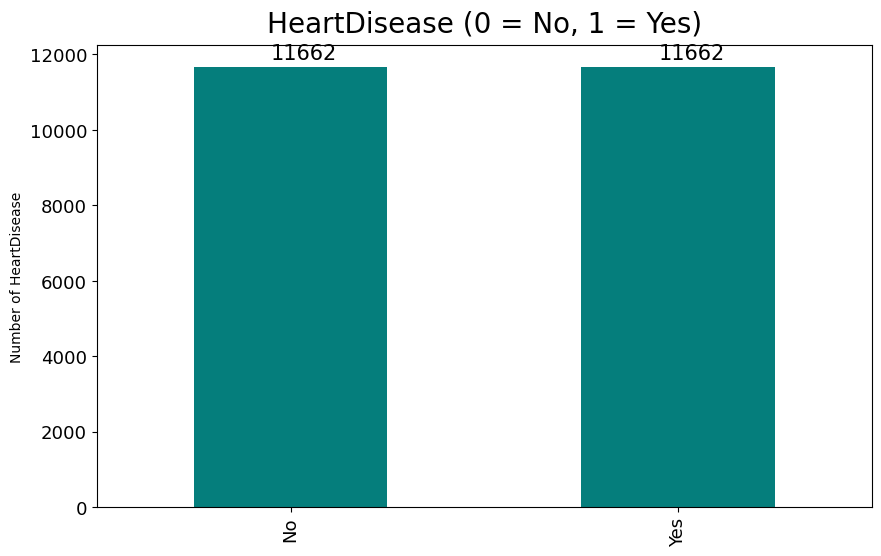

In [34]:
ax = df_SMOTE['HeartDisease'].value_counts().plot(kind ='bar',figsize=(10,6), fontsize = 13, color = '#057E7C')
ax.set_title('HeartDisease (0 = No, 1 = Yes)', size=20, pad=10)
ax.set_ylabel('Number of HeartDisease')

for i in ax.patches:
  ax.text(i.get_x()+0.2, i.get_height()+200, str(round(i.get_height(),2)),fontsize =15)

In [35]:
#Desviacion estandar original
data_std = datos_PCA.std()
data_std

C:\Users\gaby9\AppData\Local\Temp\ipykernel_15008\3450967691.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_std = datos_PCA.std()


BMI                 0.076276
PhysicalHealth      0.263234
MentalHealth        0.268345
AgeCategory         0.303308
Race                0.243580
Diabetic            0.165617
Smoking             0.491930
AlcoholDrinking     0.252362
Stroke              0.186040
DiffWalking         0.342890
PhysicalActivity    0.418917
dtype: float64

In [36]:
df_SMOTE.std()

C:\Users\gaby9\AppData\Local\Temp\ipykernel_15008\1743977312.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_SMOTE.std()


BMI                 0.072162
PhysicalHealth      0.316526
MentalHealth        0.273796
AgeCategory         0.282288
Race                0.224651
Diabetic            0.172332
Smoking             0.499709
AlcoholDrinking     0.231902
Stroke              0.293293
DiffWalking         0.422544
PhysicalActivity    0.450429
dtype: float64

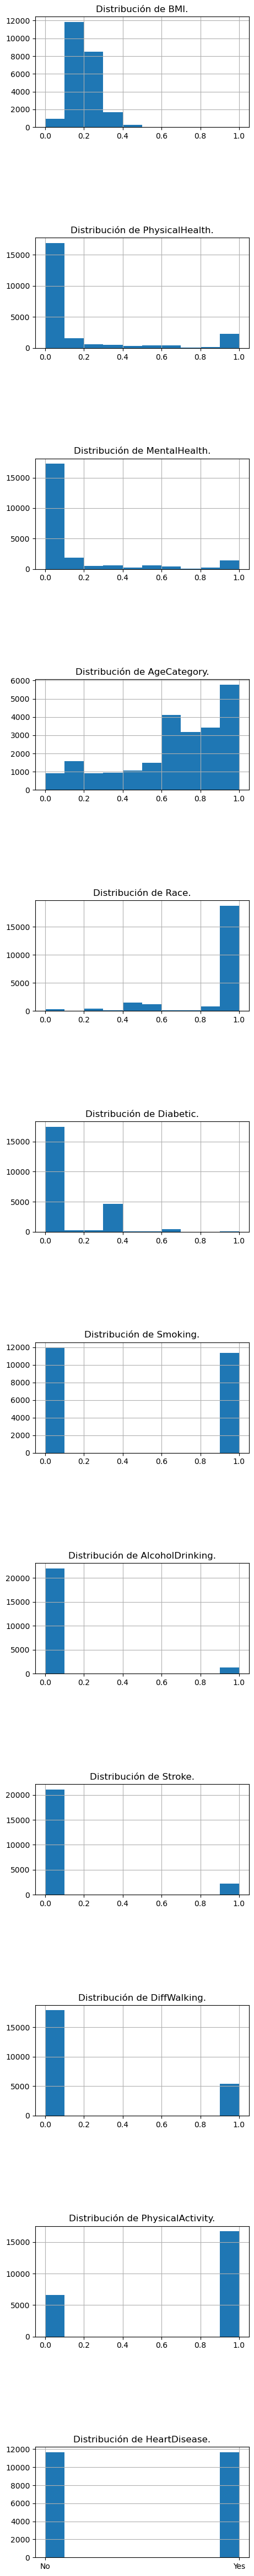

In [37]:
columnas = df_SMOTE.columns.values
fig, axs = plt.subplots(df_SMOTE.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = df_SMOTE[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)